# Iteration Observer Example

Example deconvolution of single channel in [C. Elegans](http://bigwww.epfl.ch/deconvolution/bio/) dataset with "observer"
used to view images at each deconvolution iteration.

**Reference**<br>
D. Sage, L. Donati, F. Soulez, D. Fortun, G. Schmit, A. Seitz, R. Guiet, C. Vonesch, M. Unser<br>
DeconvolutionLab2: An Open-Source Software for Deconvolution Microscopy<br>
Methods - Image Processing for Biologists, 115, 2017.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from flowdec import restoration as fd_restoration
from flowdec import data as fd_data
from skimage.exposure import rescale_intensity
from skimage.transform import rescale

In [2]:
# Load all 3 C. Elegans channels
acqs = fd_data.load_celegans()
acqs.keys()

odict_keys(['FITC', 'CY3', 'DAPI'])

In [3]:
# Create a new acquisition containing data for only the Cy3 channel downsampled to smaller image volume size
scale = .5
acq = fd_data.Acquisition(**{
    k: rescale(getattr(acqs['CY3'], k), scale, mode='constant', multichannel=False, anti_aliasing=True) 
    for k in ['data', 'kernel']
})
acq.shape()

{'actual': None, 'data': (52, 356, 336), 'kernel': (52, 356, 336)}

In [7]:
# Create an observer function where the first argument is the current state of the 
# image as it is being deconvolved, i is the current iteration number (1-based),
# and the remaining arguments (at TOW) only include the uncropped image result which
# is generally not useful for anything other than development or debugging
imgs = []
def observer(img, i, *args):
    imgs.append(img)
    if i % 10 == 0:
        print('Observing iteration = {} (dtype = {}, max = {:.3f})'.format(i, img.dtype, img.max()))

In [8]:
%%time
niter = 100
algo = fd_restoration.RichardsonLucyDeconvolver(n_dims=3, observer_fn=observer).initialize()
res = algo.run(acq, niter=100)

Observing iteration = 10 (dtype = float32, max = 0.049)
Observing iteration = 20 (dtype = float32, max = 0.062)
Observing iteration = 30 (dtype = float32, max = 0.071)
Observing iteration = 40 (dtype = float32, max = 0.078)
Observing iteration = 50 (dtype = float32, max = 0.085)
Observing iteration = 60 (dtype = float32, max = 0.091)
Observing iteration = 70 (dtype = float32, max = 0.098)
Observing iteration = 80 (dtype = float32, max = 0.105)
Observing iteration = 90 (dtype = float32, max = 0.112)
Observing iteration = 100 (dtype = float32, max = 0.119)
CPU times: user 670 ms, sys: 445 ms, total: 1.12 s
Wall time: 2.94 s


In [9]:
# Make sure that we have one image for each iteration
len(imgs)

100

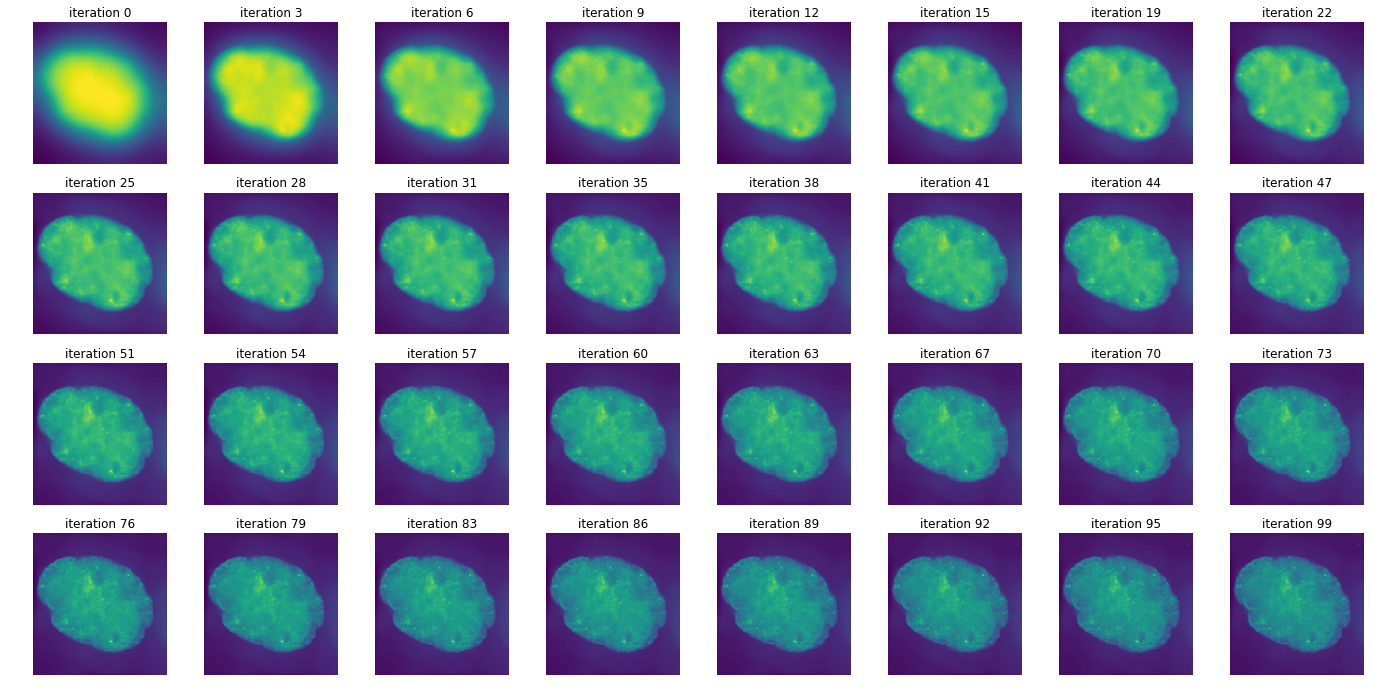

In [11]:
# Visualize the iterations
n = 32
iters = np.linspace(0, 99, num=n).astype(int)
fig, axs = plt.subplots(4, 8)
axs = axs.ravel()
fig.set_size_inches(24, 12)
for i, j in enumerate(iters):
    axs[i].axis('off')
    axs[i].set_title('iteration {}'.format(j))
    axs[i].imshow(imgs[j].max(axis=0))